<a href="https://colab.research.google.com/github/rakeshgajjar/python/blob/master/Pan_Card_Extracter_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import PIL
from PIL import ImageDraw

from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

from google.colab import drive
import tensorflow as tf

import os
import pandas as pd
import numpy as np
#!pip install xlsxwriter
# Accessing My Google Drive
drive.mount('/content/drive') #upload images to one of the folder and give it's path in the image_path variable

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
def cleanup_text(text):
    	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [6]:
image_path = "drive/My Drive/PANOLR"


def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    print(path)
    image_files = sorted([os.path.join(path, '', file)
                          for file in os.listdir(path + "")
                          if file.endswith('.JPG')])
    return image_files 

In [7]:
files = loadImages(image_path)

drive/My Drive/PANOLR


In [64]:
reader = easyocr.Reader(['en','hi'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [65]:
fileList = enumerate(files)

In [66]:
print(list(fileList))

[(0, 'drive/My Drive/PANOLR/IMG_8129.JPG'), (1, 'drive/My Drive/PANOLR/IMG_8130.JPG'), (2, 'drive/My Drive/PANOLR/IMG_8131.JPG')]


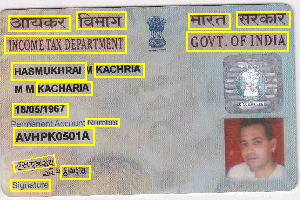

In [67]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image
draw_boxes(img,output)

In [68]:
writer = pd.ExcelWriter(image_path + "/" + 'PANCard_Reader.xlsx', engine='xlsxwriter')

In [69]:
for index, fileName in enumerate (files):
  print("Index:",index , "Files:", fileName)
  output = reader.readtext(fileName)
  print(output)
  openedImage = PIL.Image.open(fileName)
  draw_boxes(openedImage,output)

  extWordList = list()
  probList = list()

  # loop over the results
  for (bbox, text, prob) in output:
      # display the OCR'd text and associated probability
      print("[INFO] {:.4f}: {}".format(prob, text))

      extWordList.append(str(text))
      probList.append(round(float(prob),2))

      text = cleanup_text(text)

      # unpack the bounding box
      #(tl, tr, br, bl) = bbox
      #tl = (int(tl[0]), int(tl[1]))
      #tr = (int(tr[0]), int(tr[1]))
      #br = (int(br[0]), int(br[1]))
      #bl = (int(bl[0]), int(bl[1]))
      # cleanup the text and draw the box surrounding the text along
      # with the OCR'd text itself
      #cv2.rectangle(openedImage, tl, br, (0, 255, 0), 2)
      #cv2.putText(openedImage, text, (tl[0], tl[1] - 10),
      #          cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

  print("Word List Length:", len(extWordList))
  print("Probl List Length:", len(probList))

  df = pd.DataFrame({'Text': extWordList, 'Prob': probList })

  sheetName = fileName.split("/")[-1]
  sheetName = sheetName.split(".")[0]
  print ("Sheet Name:", sheetName)
  df.to_excel(writer, sheet_name=sheetName)

Index: 0 Files: drive/My Drive/PANOLR/IMG_8129.JPG
[([[83, 13], [133, 13], [133, 29], [83, 29]], 'िभाग', 0.41302958130836487), ([[192, 14], [233, 14], [233, 31], [192, 31]], 'भारत', 0.6924245953559875), ([[13, 15], [75, 15], [75, 31], [13, 31]], 'आायकर', 0.5295494198799133), ([[243, 17], [291, 17], [291, 31], [243, 31]], 'सरकार', 0.6457819938659668), ([[9, 35], [135, 35], [135, 51], [9, 51]], 'INCOIBTAKDEPRTUIINT', 0.002867144765332341), ([[195, 35], [291, 35], [291, 51], [195, 51]], 'GOVT OF INDIA', 0.05392761901021004), ([[17, 57], [125, 57], [125, 69], [17, 69]], 'HATHODDALVANT 8', 0.1449364870786667), ([[17, 81], [181, 81], [181, 95], [17, 95]], 'DHIKHUBHN DATABHAI IZATHOD', 0.014854568056762218), ([[17, 109], [75, 109], [75, 121], [17, 121]], '21/10/1989', 0.2942802608013153), ([[64, 122], [126, 122], [126, 130], [64, 130]], 'ucErlan7 Mlllmne', 4.8645903007127345e-05), ([[19, 131], [93, 131], [93, 145], [19, 145]], 'AUORR3S1३K', 0.12559537589550018)]
[INFO] 0.4130: िभाग
[INFO] 0.6

In [70]:
writer.save()